# Limpeza e Tratamento de Dados

In [31]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [32]:
# importação dos dados

dataset = pd.read_csv('../Dados/Churn.csv', sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [33]:
dataset.shape

(999, 12)

In [34]:
#Resolvendo o problema do nome das colunas

#dataset.columns = ["ID", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "CartãoCredito", "Ativo", "Salario", "Saiu"]
dataset = dataset.rename(columns={"X0": "ID", "X1": "Score", "X2": "Estado", "X3": "Genero", 
                          "X4": "Idade", "X4.1": "Patrimonio", "X6": "Saldo", 
                          "X7": "Produtos", "X8": "CartãoCredito", "X9": "Ativo", 
                          "X10": "Salario", "X11": "Saiu"})


In [35]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartãoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### Explorando dados categoricos

In [36]:
# Estado

agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    477
SC    264
dtype: int64

<Axes: xlabel='Estado'>

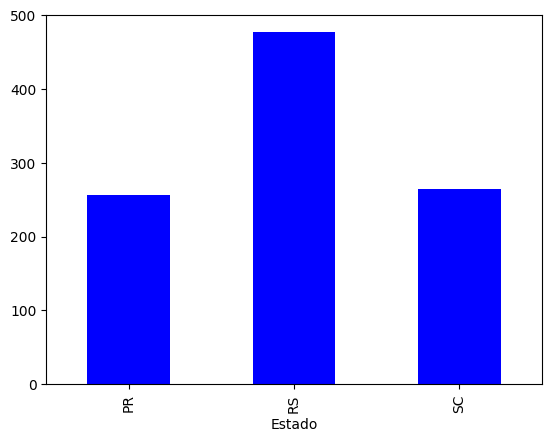

In [37]:
agrupado.plot.bar(color='blue')

In [38]:
# Genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

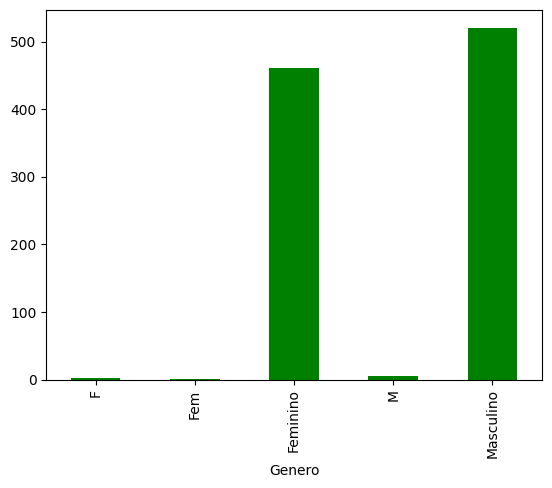

In [39]:
agrupado.plot.bar(color='green')


### Explorando dados numericos

In [40]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

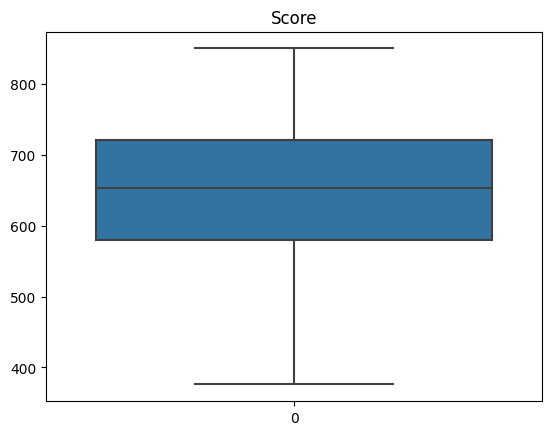

In [41]:
srn.boxplot(dataset['Score']).set_title('Score')

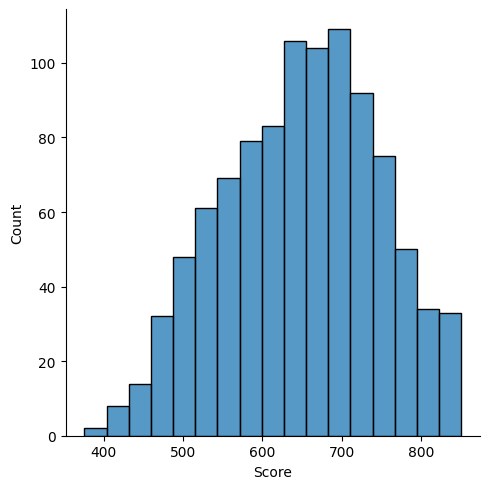

In [42]:
srn.displot(dataset['Score'])

In [43]:
# Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

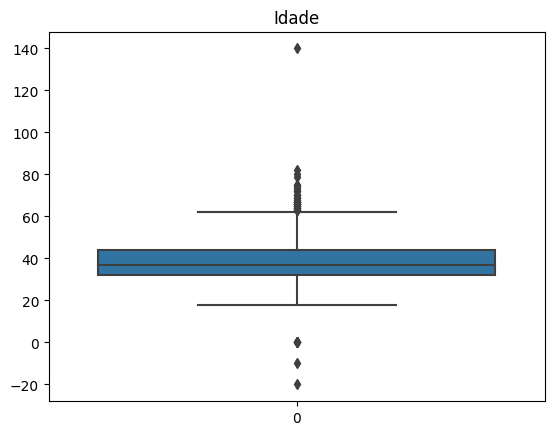

In [44]:
srn.boxplot(dataset['Idade']).set_title("Idade")

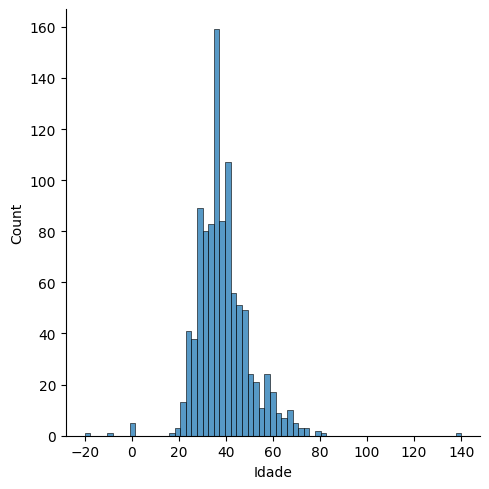

In [45]:
srn.displot(dataset['Idade'])

In [46]:
# Saldo

dataset['Saldo'].describe()


count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

<Axes: >

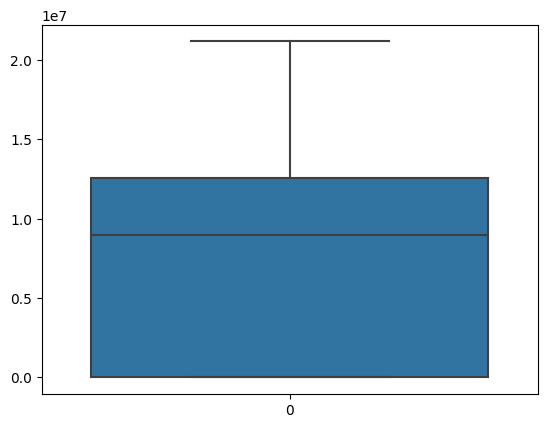

In [47]:
srn.boxplot(dataset['Saldo'])

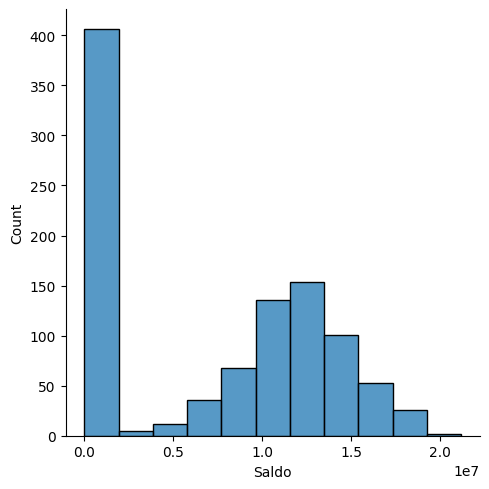

In [48]:
srn.displot(dataset['Saldo'])

In [49]:
dataset['Salario'].describe()


count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

<Axes: >

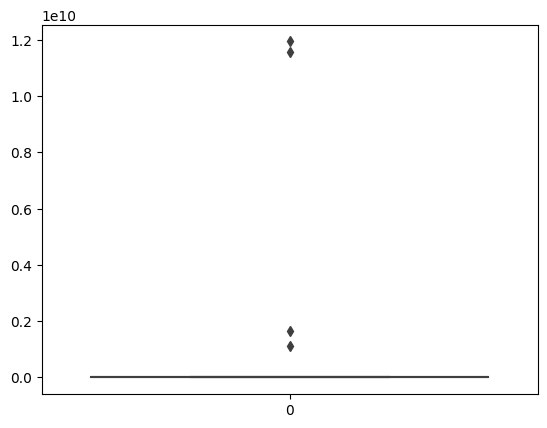

In [50]:
srn.boxplot(dataset['Salario'])

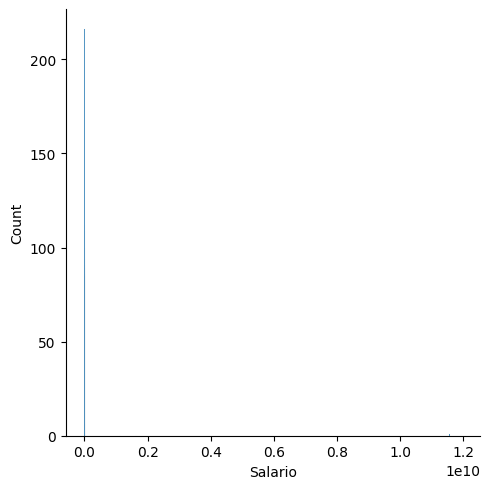

In [51]:
srn.displot(dataset['Salario'])

In [52]:
dataset.isnull().sum()

ID               0
Score            0
Estado           1
Genero           8
Idade            0
Patrimonio       0
Saldo            0
Produtos         0
CartãoCredito    0
Ativo            0
Salario          7
Saiu             0
dtype: int64

### Iniciando o Tratamento dos Dados

In [53]:
# Salario

dataset['Salario'].describe()


count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [54]:
#Calculando a mediana
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [55]:
# Substituindo por valores vazios
dataset['Salario'].fillna(mediana, inplace=True)



In [56]:
# Verificando...

dataset['Salario'].isnull().sum()

0

In [57]:
# Genero
# padronizando os valores 
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [58]:
dataset['Genero'].isnull().sum()

8

In [59]:
# Preenche NAs com masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [60]:
# Verificando...
dataset['Genero'].isnull().sum()

0

In [61]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = "Feminino"

# Visualizando o resultado
agrupado = dataset.groupby('Genero').size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [62]:
mediana = sts.median(dataset['Idade'])
mediana

37

In [64]:
# Substituir idades que estão fora dos padroes aceitaveis (0 > idade > 120)
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [66]:
# Verificando...
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartãoCredito,Ativo,Salario,Saiu


In [67]:
#ID
# Buscando dados duplicados
dataset[dataset.duplicated(['ID'], keep=False)]


,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartãoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [69]:
# Excluindo duplicados
dataset.drop_duplicates(subset="ID", keep='first', inplace=True)

In [70]:
#Verificando...
dataset[dataset.duplicated(['ID'], keep=False)]


,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartãoCredito,Ativo,Salario,Saiu


In [71]:
# Salario
#outliers em salario
desv = sts.stdev(dataset['Salario'])

desv

528988918.4679201

In [72]:
dataset.loc[dataset['Salario'] >= 2*desv]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartãoCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [73]:
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [74]:
# atribuindo aos valores correspondente ao outliers
dataset.loc[dataset['Salario'] >= 2*desv, 'Salario'] = mediana
# chegando se algum atende ao critério
dataset.loc[dataset['Salario'] >= 2*desv]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartãoCredito,Ativo,Salario,Saiu


In [75]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,CartãoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [76]:
dataset.shape

(998, 12)